In [1]:
import logging
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
import scipy.stats as ss
import numpy as np
import scipy.stats as ss
sc.set_figure_params(dpi=250, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
import pandas as pd

In [3]:
VAE_flows_mono_f = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/hematopoiesis/Mono_forward_.h5ad")
VAE_flows_mono_b = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/hematopoiesis/Mono_backward_.h5ad")
VAE_flows_neutro_b = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/hematopoiesis/Neutro_backward_.h5ad")
VAE_flows_neutro_f = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/hematopoiesis/Neutro_forward_.h5ad")


In [4]:
objects = [VAE_flows_mono_f,VAE_flows_neutro_f,VAE_flows_mono_b,VAE_flows_neutro_b]
pred_data = ["Mature Monocytes","Mature Neutrophils","Monocytes progenitors","Neutrophils progenitors"]

In [5]:
plot_data = []
for i in range(4):
	plot_data.append(np.vstack((objects[i].uns["mean_correlations"],objects[i].uns["std_correlations"],objects[i].uns["mean_slope"],objects[i].uns["std_slope"],np.repeat(pred_data[i],50))))



In [6]:
data_df = pd.DataFrame(np.hstack(plot_data).T,columns=["Mean correlations","Std correlations","mean_slope","std_slope","Predictions"])

In [7]:
data_df["Mean correlations"] = data_df["Mean correlations"].astype(float)
data_df["Std correlations"] = data_df["Std correlations"].astype(float)
data_df["mean_slope"] = data_df["mean_slope"].astype(float)
data_df["std_slope"] = data_df["std_slope"].astype(float)

In [8]:
data_df

,Mean correlations,Std correlations,mean_slope,std_slope,Predictions
0,0.214845,0.294503,0.761404,0.382752,Mature Monocytes
1,0.226465,0.300409,0.758738,0.378315,Mature Monocytes
2,0.222828,0.307553,0.758822,0.375789,Mature Monocytes
3,0.216805,0.299632,0.762188,0.383348,Mature Monocytes
4,0.224304,0.307647,0.757172,0.372263,Mature Monocytes
...,...,...,...,...,...
195,0.005961,0.036412,0.718200,2.886813,Neutrophils progenitors
196,0.006373,0.037012,0.727462,2.913401,Neutrophils progenitors
197,0.006244,0.035371,0.719971,2.818242,Neutrophils progenitors
198,0.006561,0.036157,0.728231,2.915300,Neutrophils progenitors


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

def corrfunc(x, y, **kws):
	slope, intercept, r, p_value, _err = stats.linregress(x, y)
	ax = plt.gca()
	ax.annotate("$R^2$ = {:.2f}".format(r**2),
				xy=(.7, .9), xycoords=ax.transAxes)

def Plotting_Correlation_genes(data_object,title,gene_list):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.average(real_data.X,axis = 0),np.average(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    x = np.mean(real_data.X,axis = 0)
    y = np.mean(pred_data.X,axis = 0)
    scanpy_obj_data = np.vstack((x,y))
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o")
   #major_ticks = np.arange(0, 100,20)
    #ax.set_xticks(major_ticks)
    #ax.set_yticks(major_ticks)
    #plt.xlim(-10,80) 
    #plt.ylim(-10,80)
    plt.grid(False)
    sns.despine(offset=5)
    plt.xlabel(X,fontsize = 20)
    plt.ylabel(Y,fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20) 
    for i in gene_list:
        j = data_object.var_names.tolist().index(i)
        x_bar = x[j]
        y_bar = y[j]
        plt.text(x_bar, y_bar, i, fontsize=10, color="black")
        plt.plot(x_bar, y_bar, "o", color="red", markersize=7)
    plt.show()
    
def Plotting_Correlation_var(data_object,title,gene_list):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.std(real_data.X,axis = 0),np.std(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    x = np.std(real_data.X,axis = 0)
    y = np.std(pred_data.X,axis = 0)
    scanpy_obj_data = np.vstack((x,y))
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o")
   #major_ticks = np.arange(0, 100,20)
    #ax.set_xticks(major_ticks)
    #ax.set_yticks(major_ticks)
    #plt.xlim(-10,80) 
    #plt.ylim(-10,80)
    plt.grid(False)
    sns.despine(offset=5)
    plt.xlabel(X,fontsize = 20)
    plt.ylabel(Y,fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20) 
    for i in gene_list:
        j = data_object.var_names.tolist().index(i)
        x_bar = x[j]
        y_bar = y[j]
        plt.text(x_bar, y_bar, i, fontsize=10, color="black")
        plt.plot(x_bar, y_bar, "o", color="red", markersize=7)
    plt.show()

In [18]:
gene_list = ['S100a8', 'Ngp', 'S100a9']

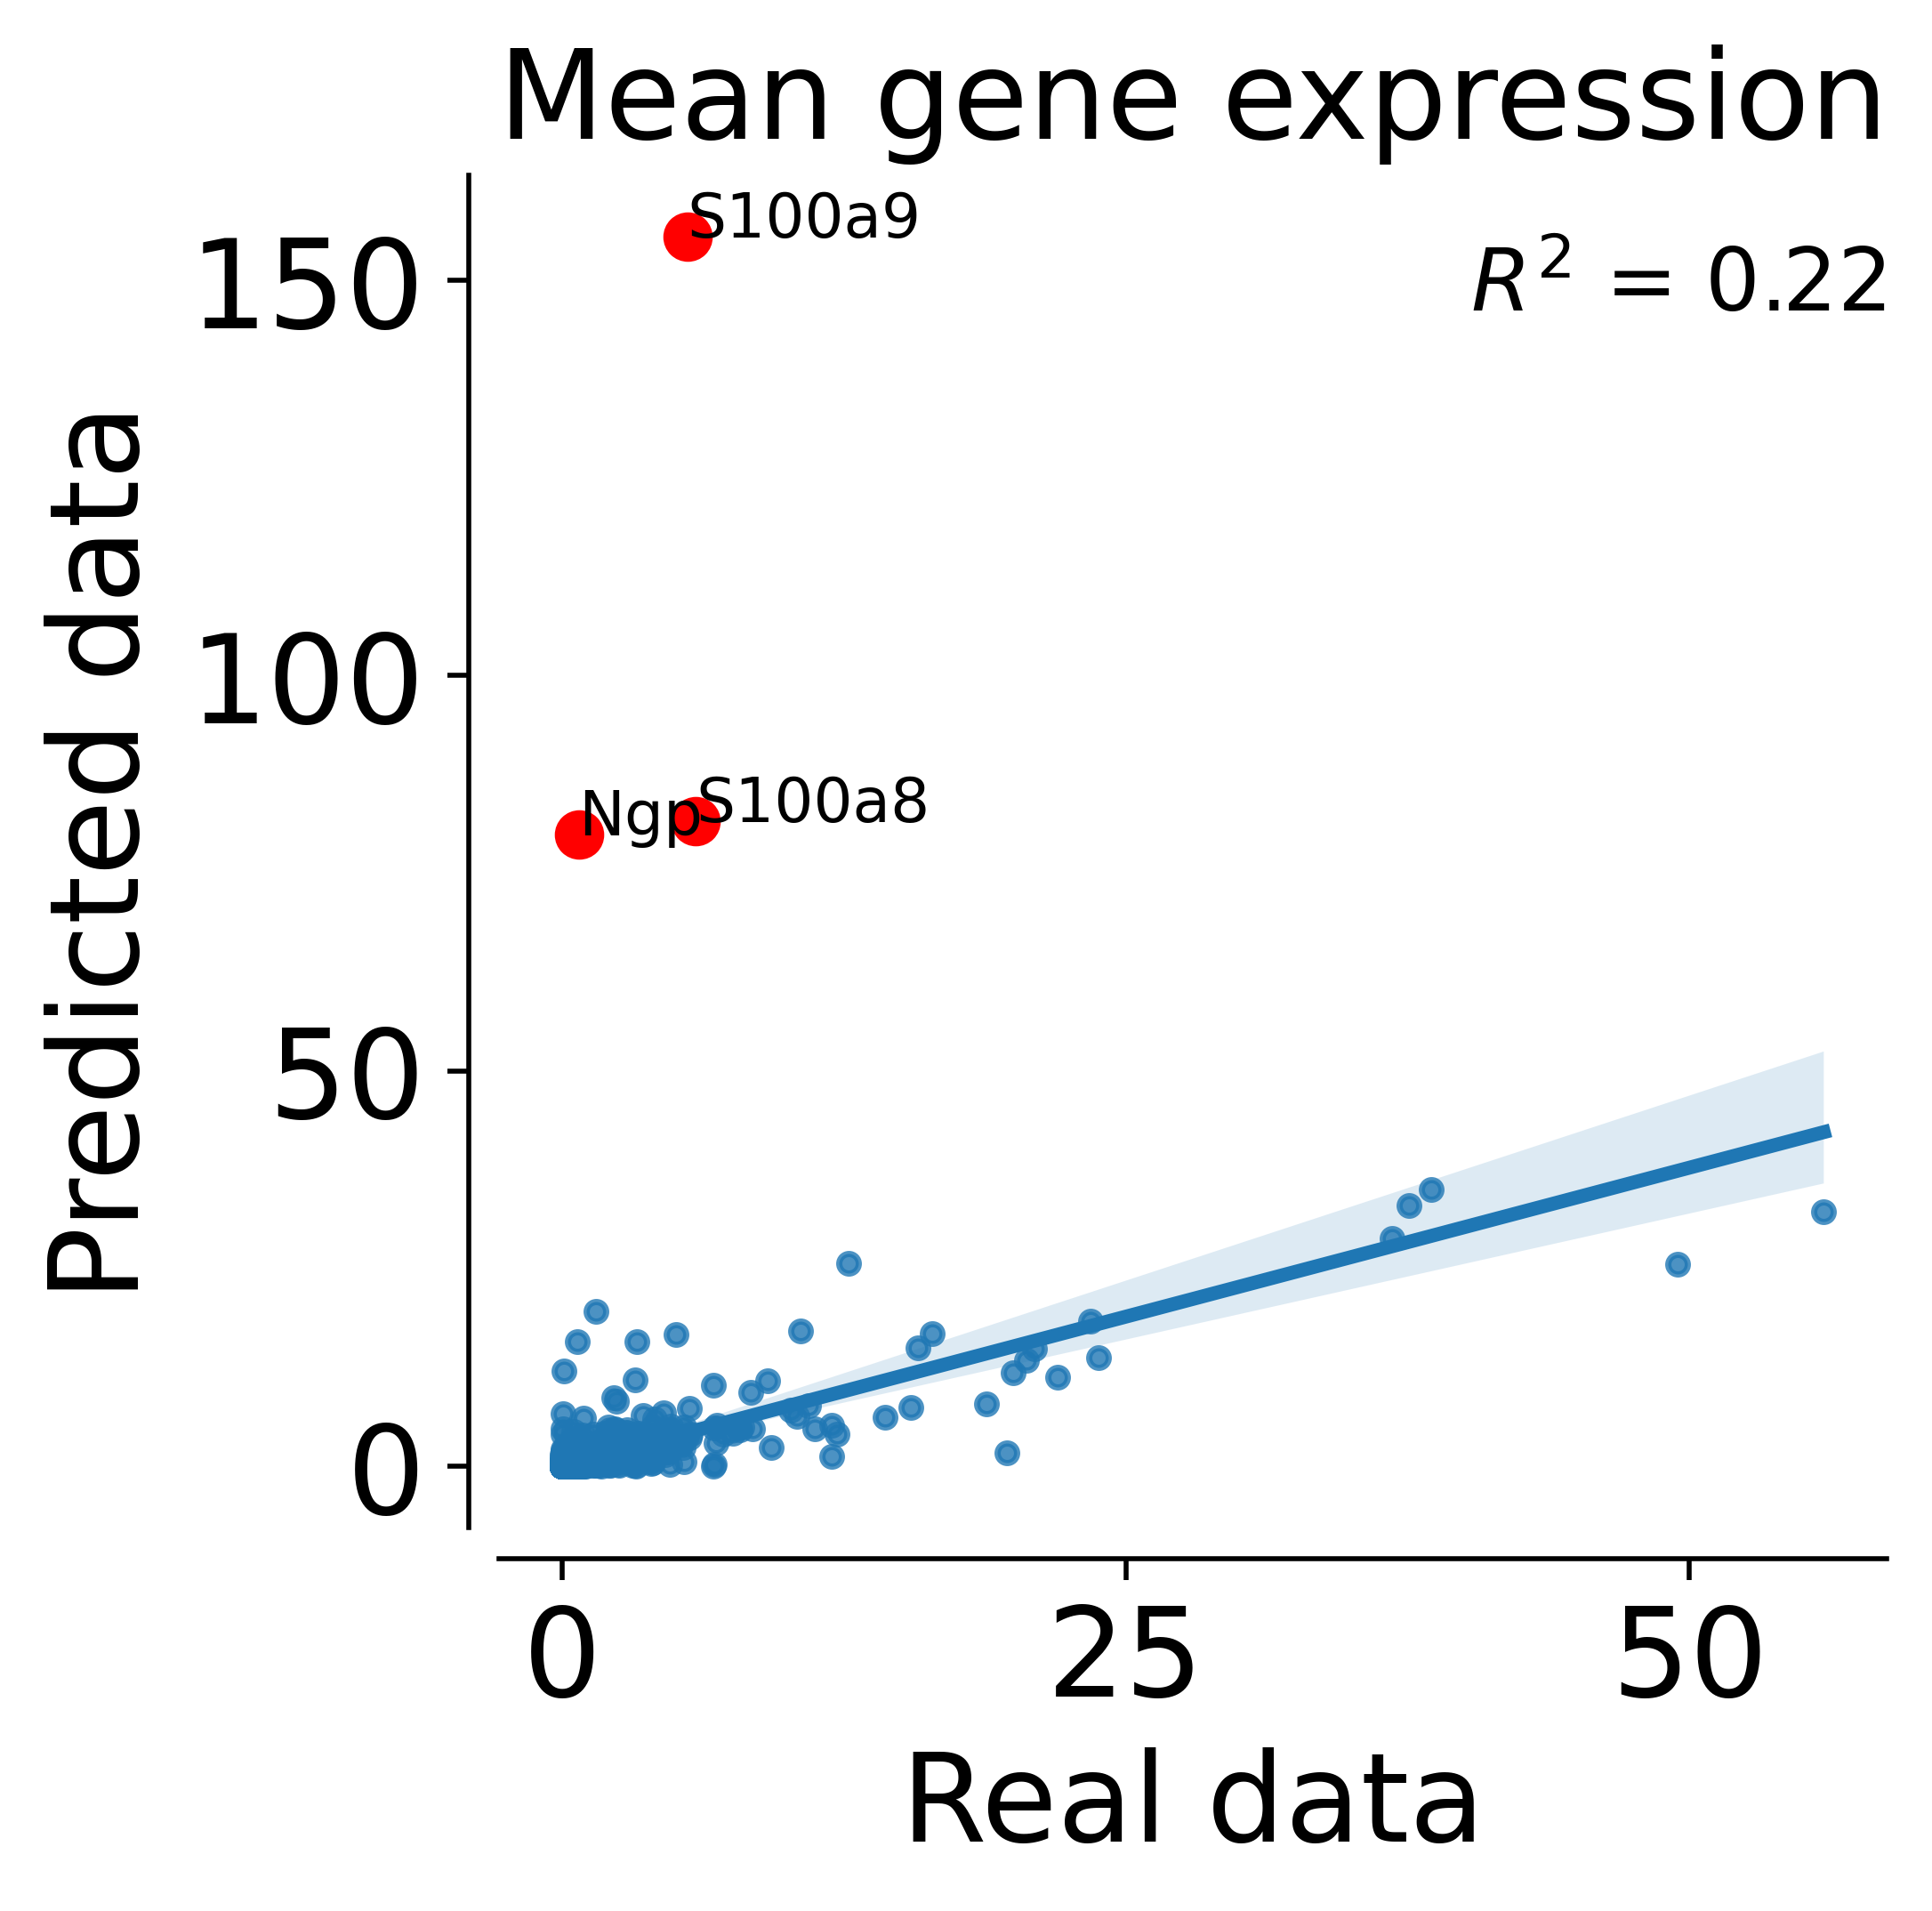

In [19]:
Plotting_Correlation_genes(VAE_flows_mono_f,"Mean gene expression",gene_list)


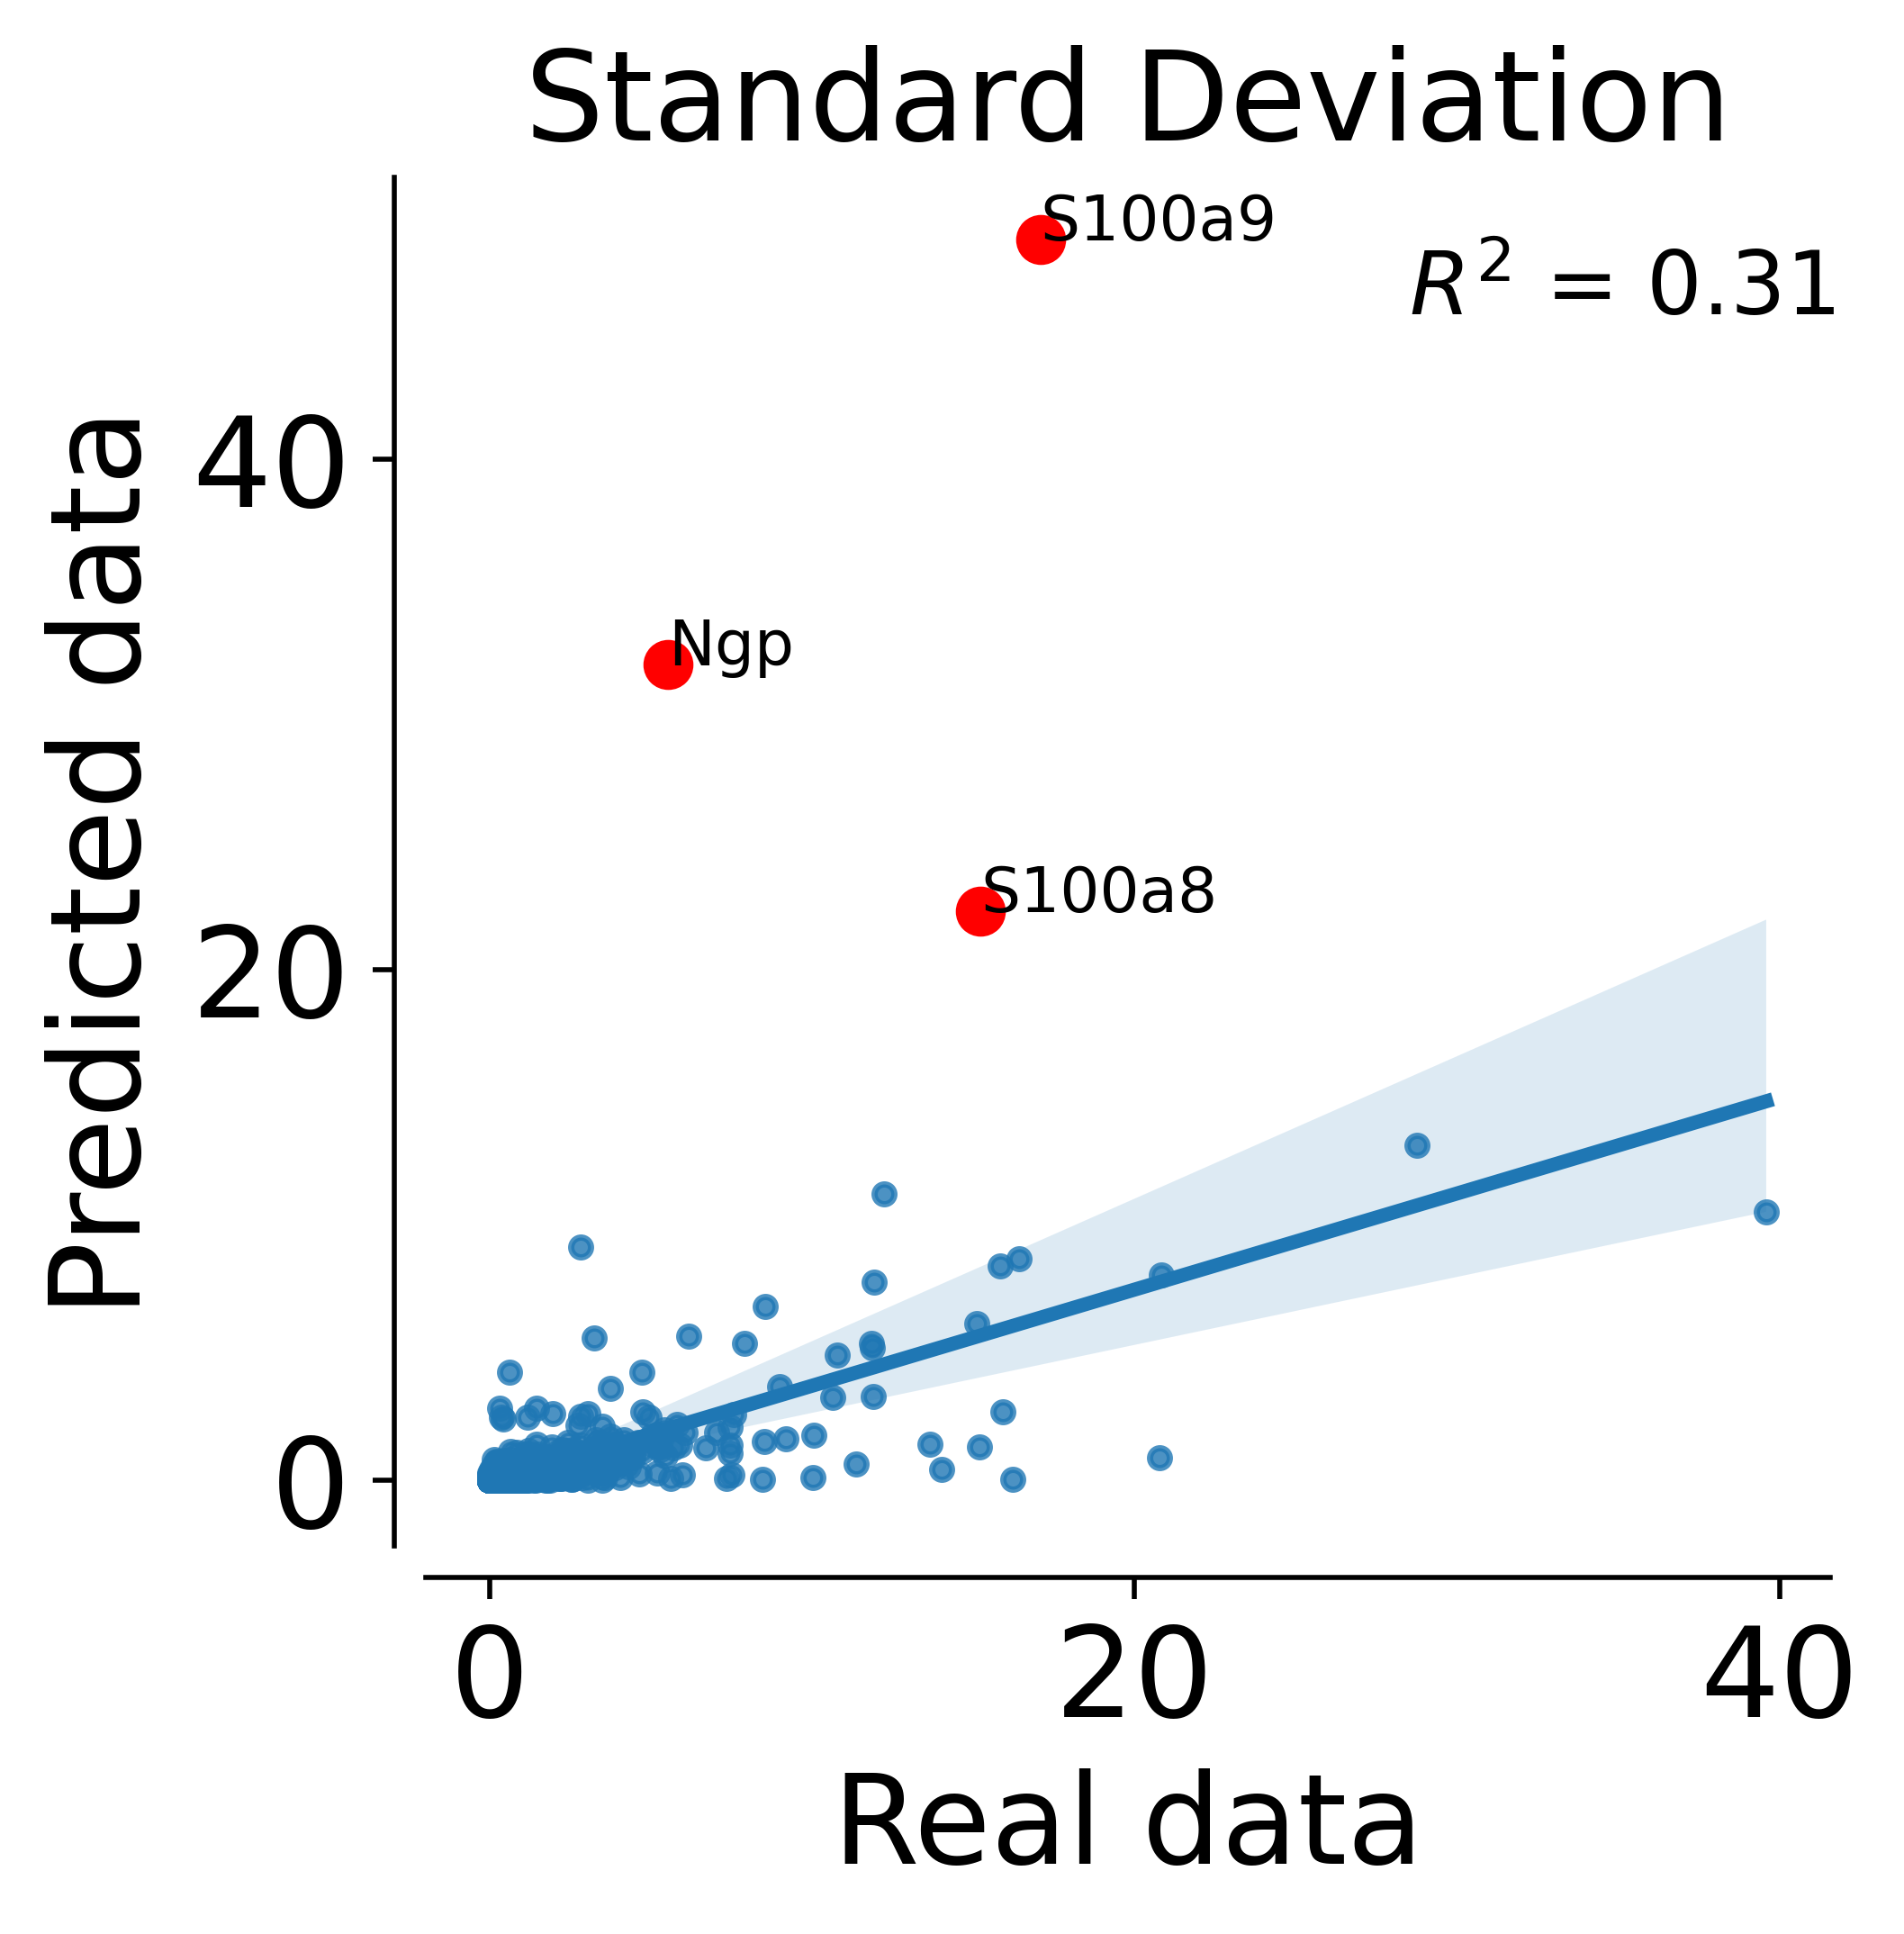

In [20]:
Plotting_Correlation_var(VAE_flows_mono_f,"Standard Deviation",gene_list)

In [21]:
VAE_flows_mono_f_wg = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/hematopoiesis/Mono_forward_without_dominant_genes.h5ad")
VAE_flows_mono_b_wg = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/hematopoiesis/Mono_backward_without_dominant_genes.h5ad")
VAE_flows_neutro_b_wg = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/hematopoiesis/Neutro_backward_without_dominant_genes.h5ad")
VAE_flows_neutro_f_wg = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/hematopoiesis/Neutro_forward_without_dominant_genes.h5ad")


In [22]:
objects = [VAE_flows_mono_f,VAE_flows_neutro_f,VAE_flows_mono_b,VAE_flows_neutro_b]
pred_data = ["Mature Monocytes","Mature Neutrophils","Monocytes progenitors","Neutrophils progenitors"]
Trained = "With all genes"
plot_data = []
for i in range(4):
	plot_data.append(np.vstack((objects[i].uns["mean_correlations"],objects[i].uns["std_correlations"],objects[i].uns["mean_slope"],objects[i].uns["std_slope"],np.repeat(pred_data[i],50),np.repeat(Trained,50))))

data_df = pd.DataFrame(np.hstack(plot_data).T,columns=["Mean correlations","Std correlations","mean_slope","std_slope","Predictions","Trained"])

data_df["Mean correlations"] = data_df["Mean correlations"].astype(float)
data_df["Std correlations"] = data_df["Std correlations"].astype(float)
data_df["mean_slope"] = data_df["mean_slope"].astype(float)
data_df["std_slope"] = data_df["std_slope"].astype(float)

In [23]:
objects = [VAE_flows_mono_f_wg,VAE_flows_neutro_f_wg,VAE_flows_mono_b_wg,VAE_flows_neutro_b_wg]
pred_data = ["Mature Monocytes","Mature Neutrophils","Monocytes progenitors","Neutrophils progenitors"]
Trained = "Without dominant genes"
plot_data = []
for i in range(4):
	plot_data.append(np.vstack((objects[i].uns["mean_correlations"],objects[i].uns["std_correlations"],objects[i].uns["mean_slope"],objects[i].uns["std_slope"],np.repeat(pred_data[i],50),np.repeat(Trained,50))))

data_df_wg = pd.DataFrame(np.hstack(plot_data).T,columns=["Mean correlations","Std correlations","mean_slope","std_slope","Predictions","Trained"])

data_df_wg["Mean correlations"] = data_df_wg["Mean correlations"].astype(float)
data_df_wg["Std correlations"] = data_df_wg["Std correlations"].astype(float)
data_df_wg["mean_slope"] = data_df_wg["mean_slope"].astype(float)
data_df_wg["std_slope"] = data_df_wg["std_slope"].astype(float)

In [24]:
df_all = pd.concat([data_df,data_df_wg])

(array([0, 1, 2, 3]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

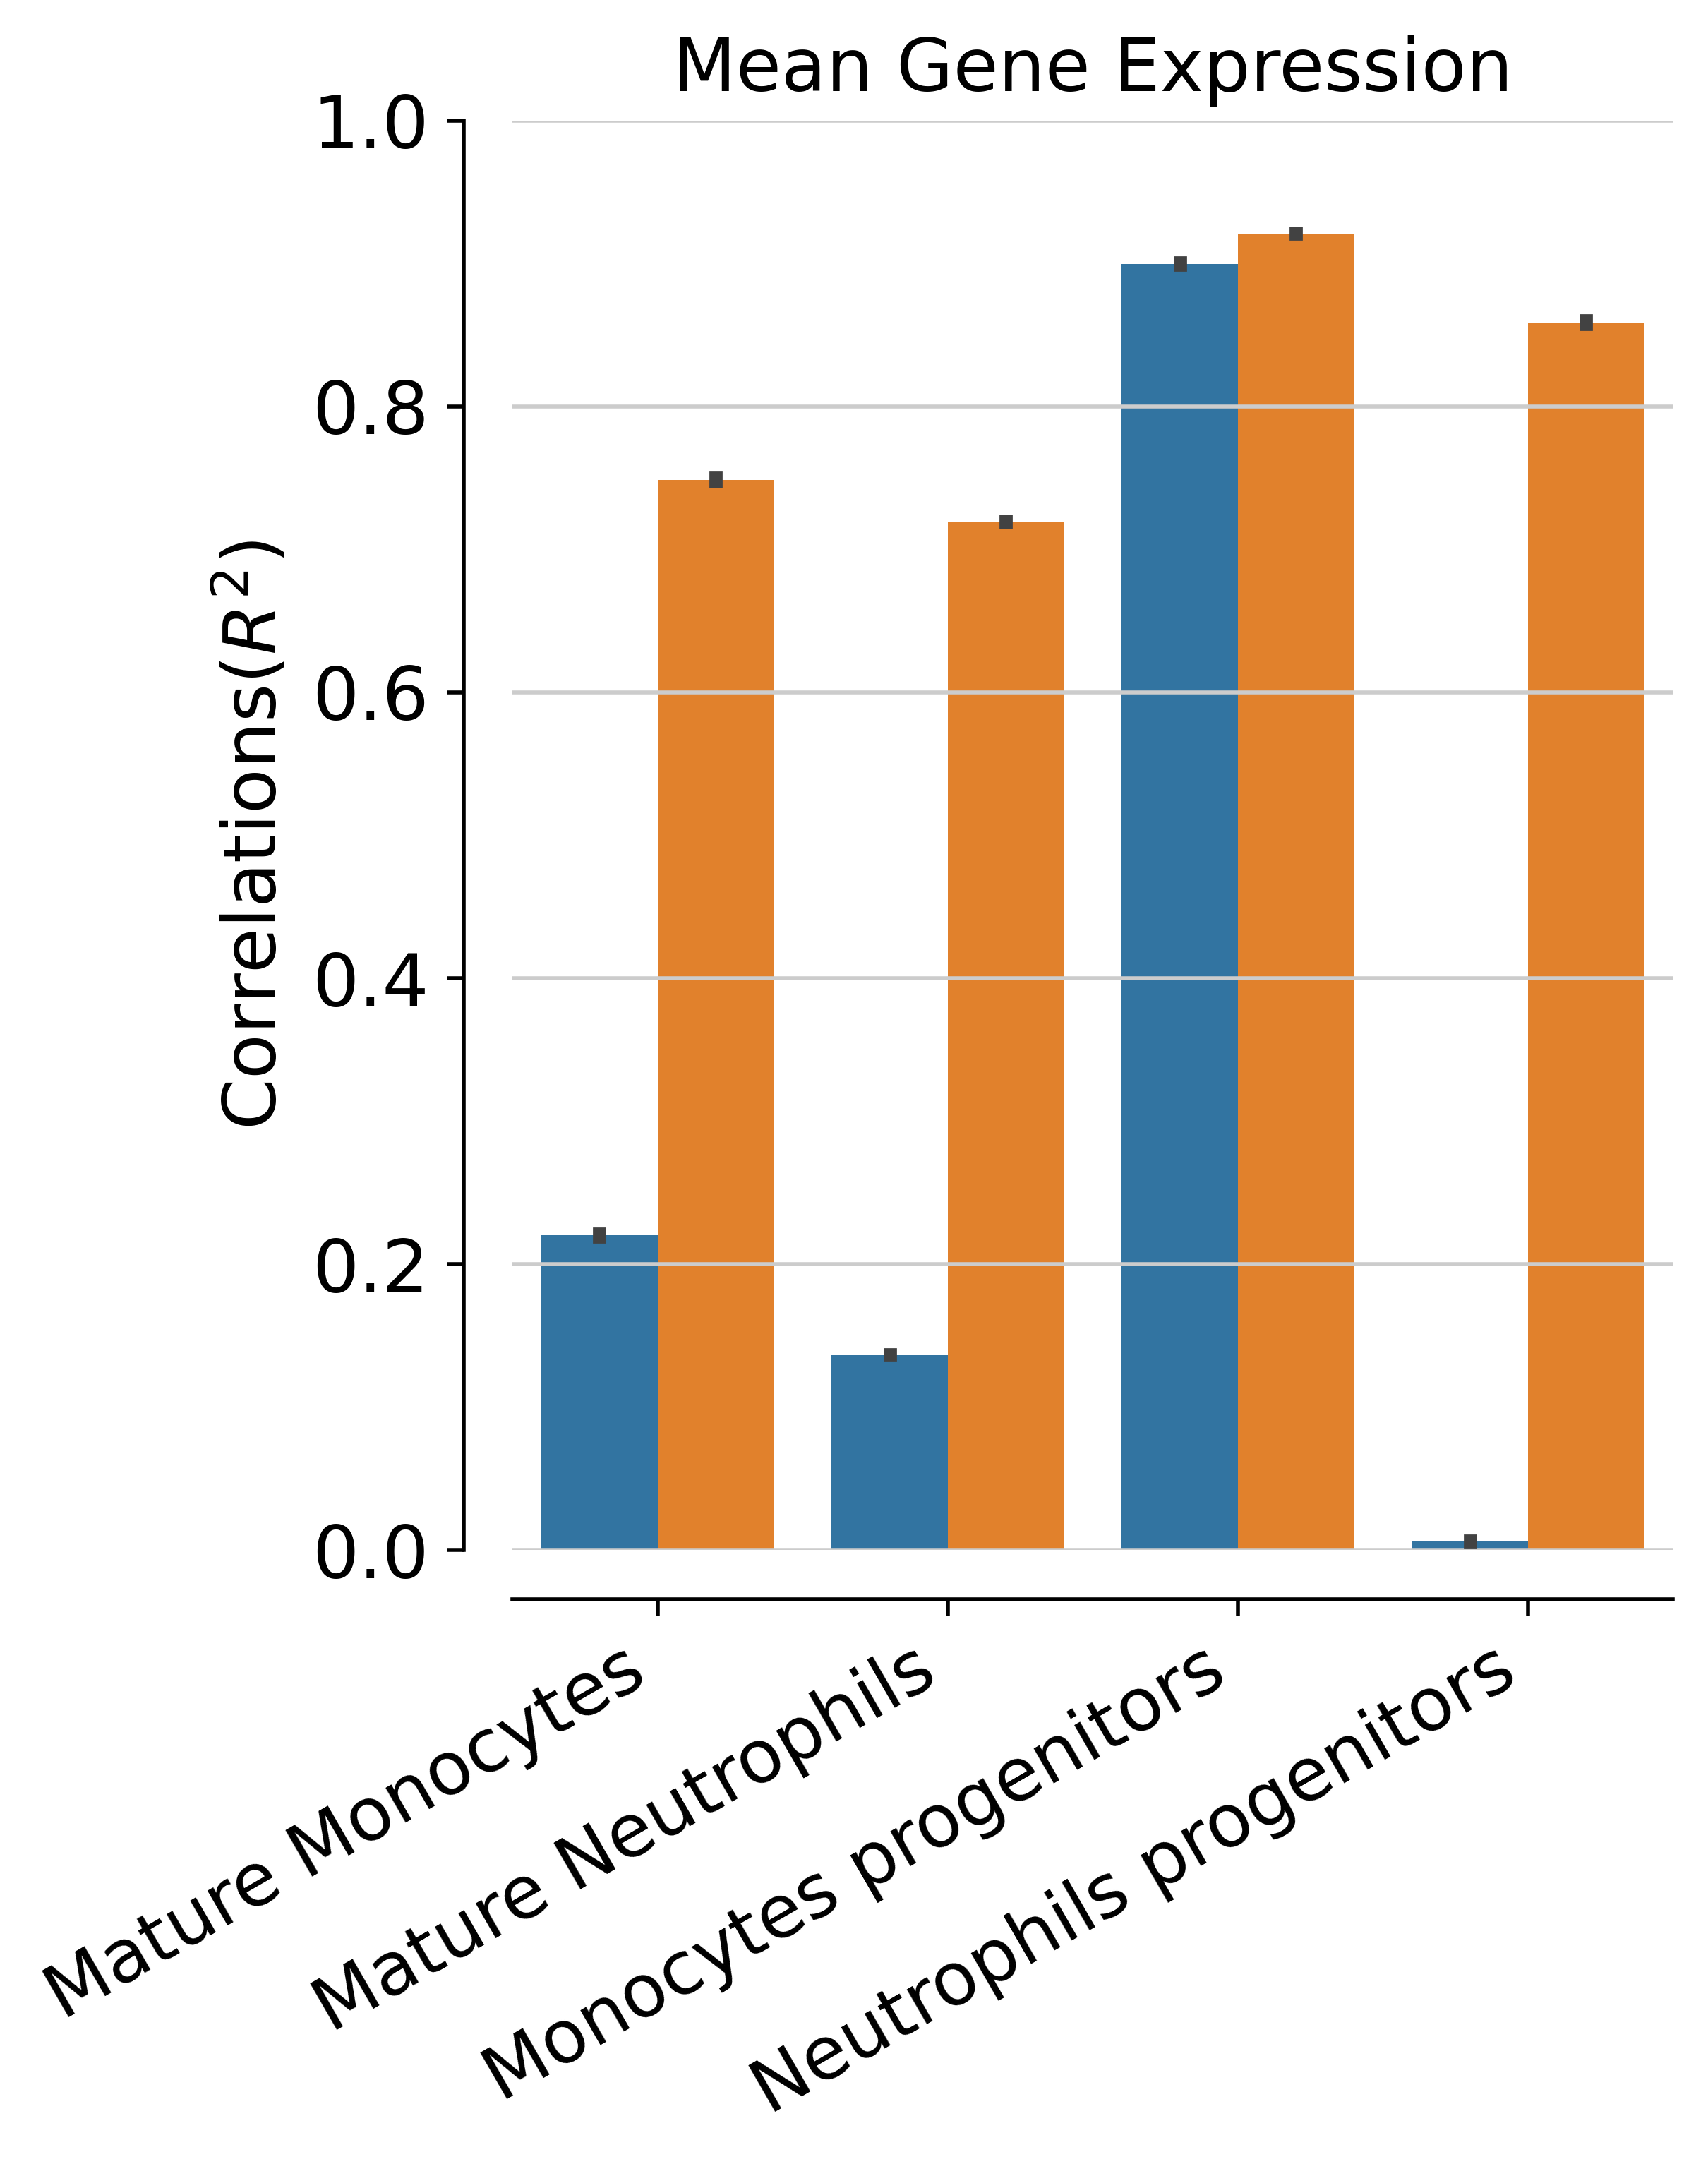

In [27]:
ax = sns.catplot(x ="Predictions",y="Mean correlations",data=df_all,hue = "Trained",kind="bar",legend= False)
sns.despine(offset=10)
ax.set(ylim=(0, 1))
font_size = 15
plt.title("Mean Gene Expression",fontsize = font_size)
plt.xlabel('',fontsize = font_size)
plt.ylabel('Correlations($R^2$)',fontsize = font_size)
plt.tick_params(labelsize=font_size)
plt.xticks(rotation=30,ha='right')



(array([0, 1, 2, 3]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

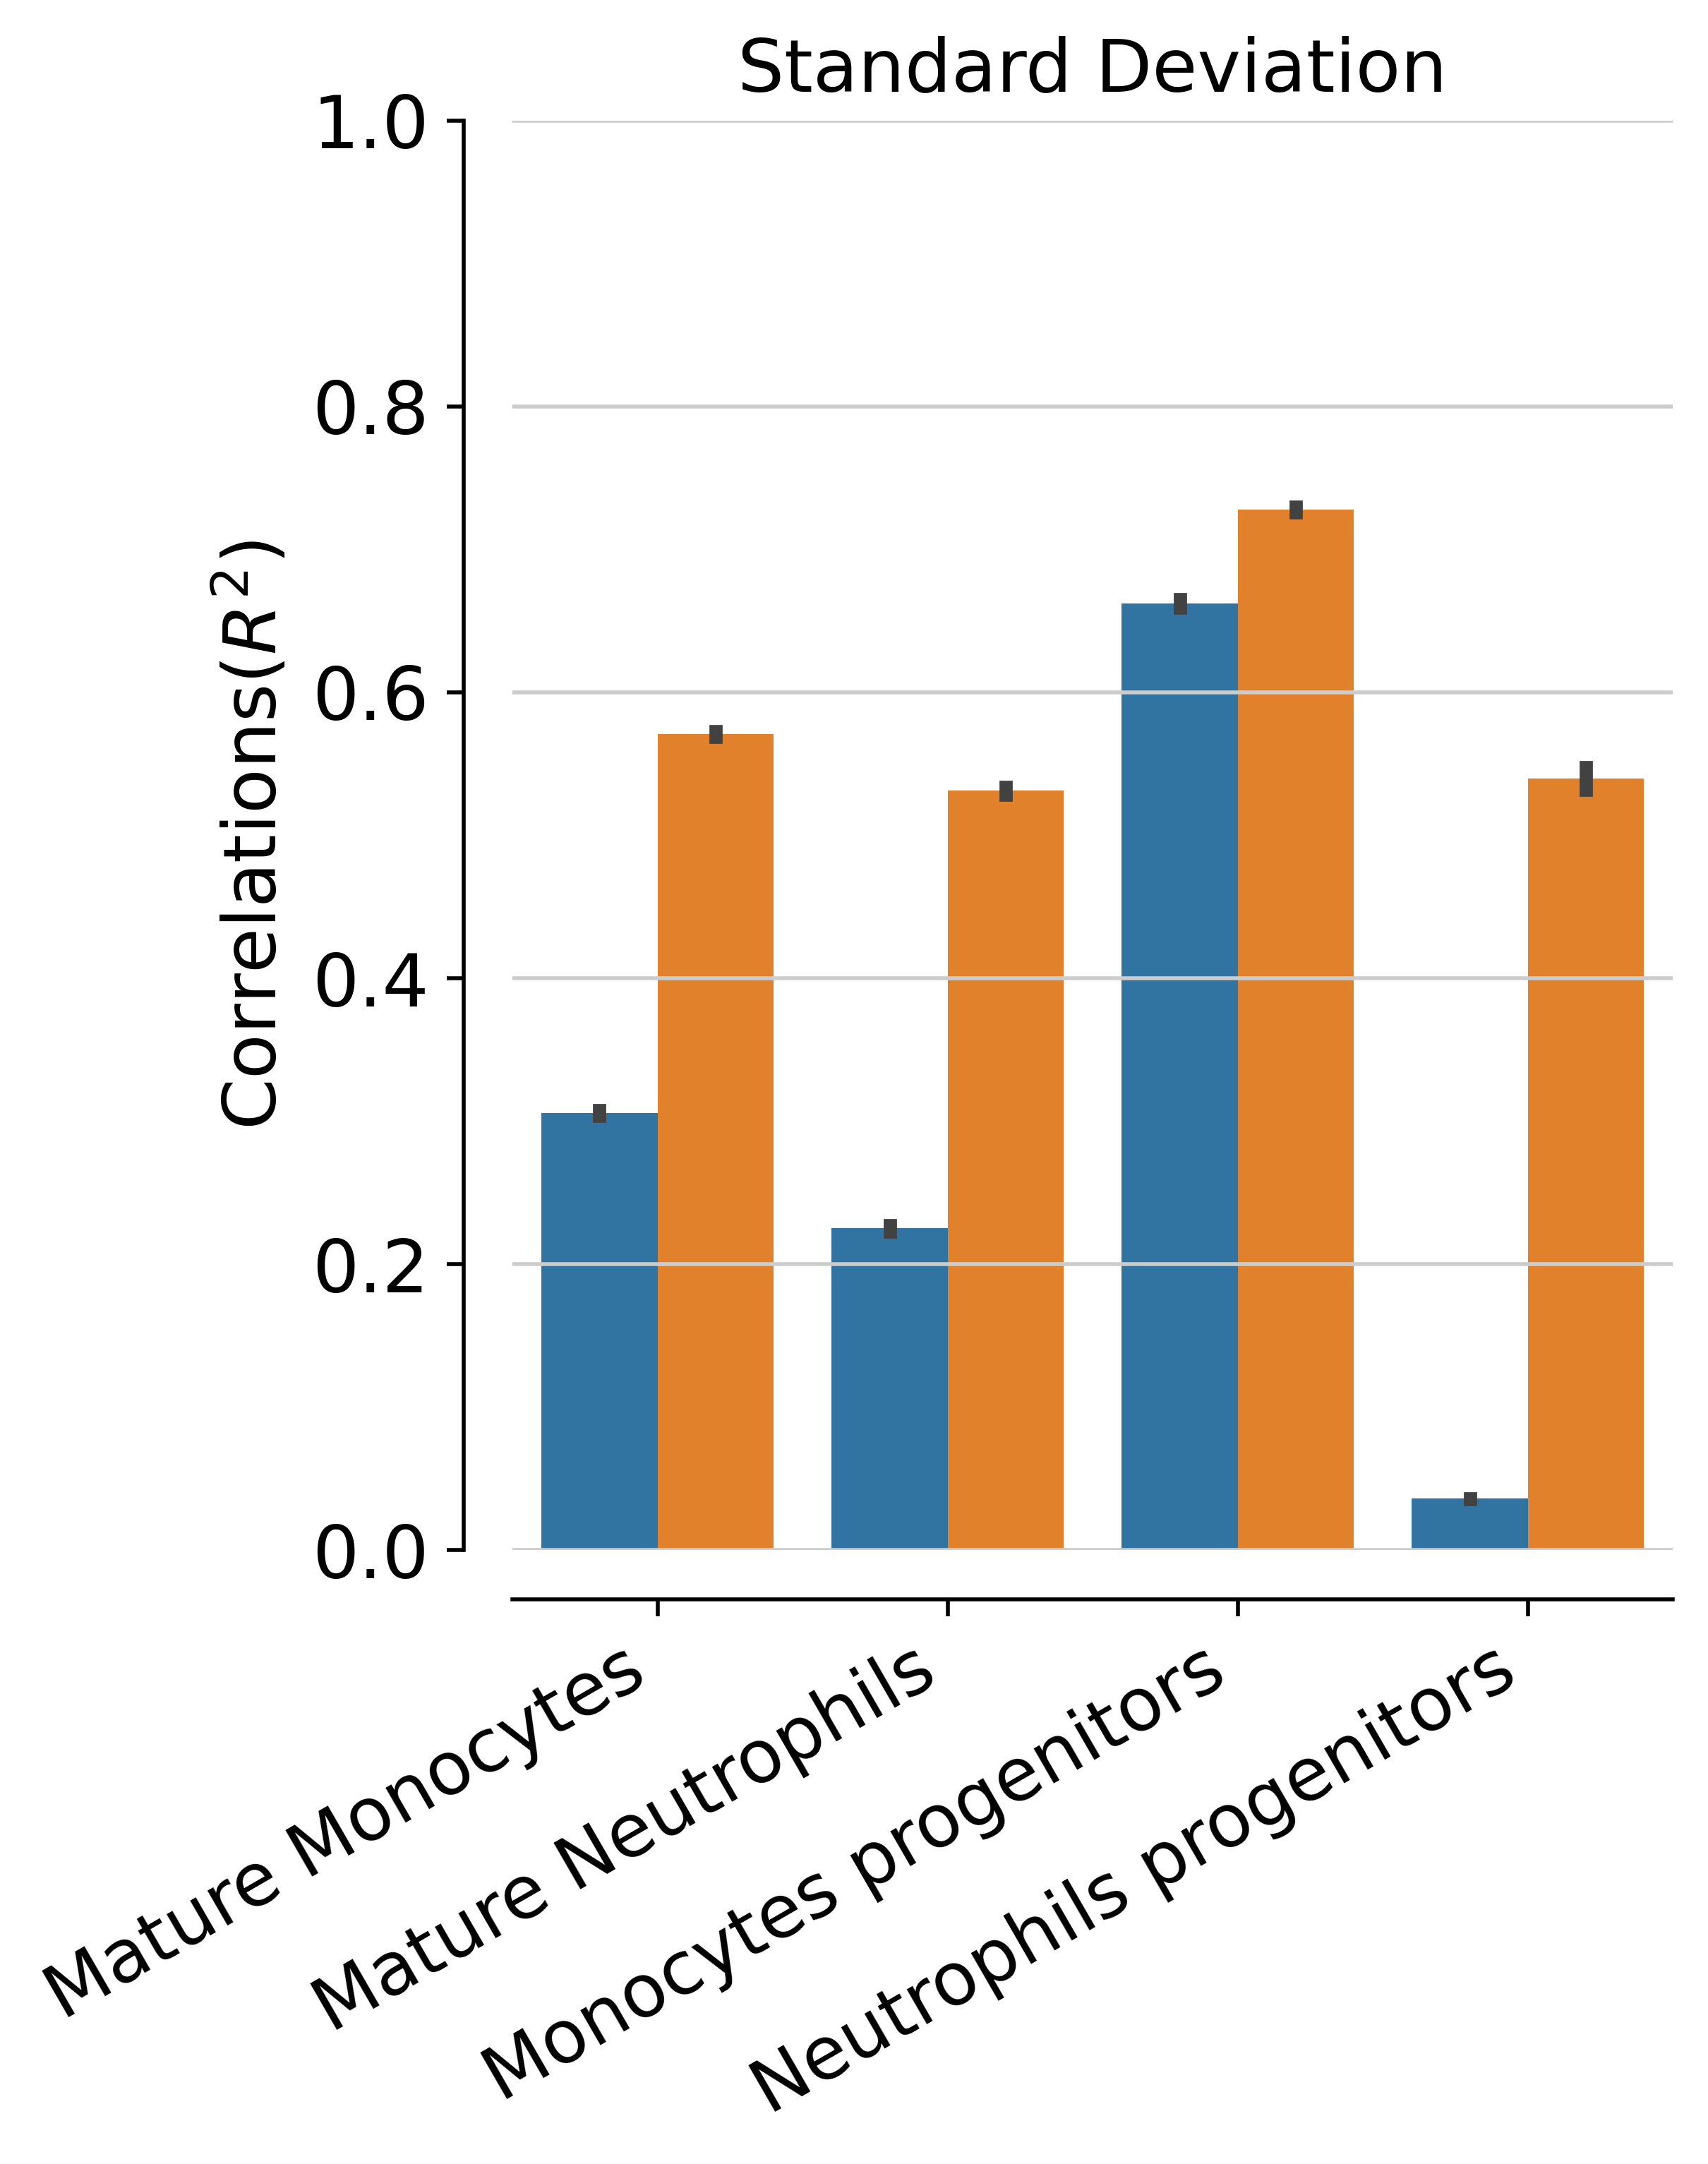

In [26]:
ax = sns.catplot(x ="Predictions",y="Std correlations",data=df_all,hue = "Trained",kind="bar",legend= False)
sns.despine(offset=10)
ax.set(ylim=(0, 1))
font_size = 15
plt.title("Standard Deviation",fontsize = font_size)
plt.xlabel('',fontsize = font_size)
plt.ylabel('Correlations($R^2$)',fontsize = font_size)
plt.tick_params(labelsize=font_size)
plt.xticks(rotation=30,ha='right')
